In [252]:
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim, logging
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 7.0)
import random
import math
import numpy as np

seed = 42
np.random.seed(seed)

import os
import pandas as pd
from collections import defaultdict
from Bio import SeqIO

from nltk import trigrams
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from sklearn.metrics import matthews_corrcoef

from keras.layers import Dropout
from keras.layers import Input, Dense, Lambda, LSTM, RepeatVector, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model
from keras import backend as K
#from keras import objectives
from keras.datasets import mnist
from keras import regularizers
from keras.layers import GaussianNoise
from keras.layers import Activation
from keras.callbacks import LearningRateScheduler, EarlyStopping

#from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras import regularizers
#from keras.regularizers import l2, activity_l2, l1, activity_l1
#from keras.optimizers import Adam, SGD

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import dask.dataframe as dd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy import interp
from itertools import cycle
from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from gensim.models import KeyedVectors


from sklearn.naive_bayes import GaussianNB


glove_input_file = r"C:\Users\AMD\Desktop\New folder\New_gloves.txt"
word2vec_output_file = 'glove_to_word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

new_model =KeyedVectors.load_word2vec_format('glove_to_word2vec.txt',binary=False)

2021-12-02 01:28:37,567 : INFO : converting 8963 vectors from C:\Users\AMD\Desktop\New folder\New_gloves.txt to glove_to_word2vec.txt
2021-12-02 01:28:37,690 : INFO : loading projection weights from glove_to_word2vec.txt
2021-12-02 01:28:41,006 : INFO : loaded (8963, 200) matrix from glove_to_word2vec.txt


In [253]:
def chars_per_line(file_name):
    with open(file_name,"rU") as handle:
        Negat=SeqIO.parse(handle, "fasta")
        Negat_lis=[record for record in Negat if len(record.seq) >= 30]
      
        print("Found %i prefered negative sequence length" %len(Negat_lis))
        #SeqIO.write(Negat_lis,"Negative_Dataset_Corpus.fasta","fasta")
        SeqIO.write(Negat_lis[0:1208],"Pre_met_Negative_training_set.fasta","fasta")
        #print(curated_seq_positives[0:5])
chars_per_line(r"C:\Users\AMD\Desktop\New_Patric\Protein\Len(450)_New_Susceptible_Negative")


def chars_per_line(file_name):
    with open(file_name,"rU") as handle:
        #outputfile=open("The positive cases","w")
        #nega_bact=open("Negative set",'w')
        Posit=SeqIO.parse(handle, "fasta")
        Posit_lis=[record for record in Posit                          if len(record.seq) >= 30]
        #random.shuffle(Posit_lis)
        #print(curated_seq_positives)i
        #SeqIO.write(Posit_lis,"Positive_Dataset_Corpus.fasta","fasta")
        print("Found %i prefered Positive sequence length" %len(Posit_lis))
        SeqIO.write(Posit_lis[0:1208],"Pre_met_Positive_training_set.fasta","fasta")
        #SeqIO.write(Posit_lis[753:1208],"Metallic_pre_testing_training_set.fasta","fasta")
            
            #print(curated_seq_positives[0:5])
#chars_per_line(r"C:\Users\AMD\Desktop\Specific\metals\BacMet2_EXP_database_1")
chars_per_line(r"C:\Users\AMD\Desktop\Pre_metall\50%_Pre_BacMet.1")

filenames =r"Pre_met_Positive_training_set.fasta",r"Pre_met_Negative_training_set.fasta"
with open('Pre_metal_Training_dataset', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)


Training_set=SeqIO.parse('Pre_metal_Training_dataset','fasta')
Training_set=[record for record in Training_set]
#print("Found %i prefered sequence length" %len(Training_set_seq))
print("The minimum Corpus sequence length is:",min(len(seq) for seq in Training_set))
print("The maximum Corpus sequence length is:",max(len(seq) for seq in Training_set))
print("Found %i prefered sequence length" %len(Training_set))
SeqIO.write(Training_set,"Pre_Metal_Training_Old.fasta","fasta")

Found 1455 prefered negative sequence length
Found 1634 prefered Positive sequence length
The minimum Corpus sequence length is: 30
The maximum Corpus sequence length is: 1895
Found 2416 prefered sequence length


<ipython-input-253-671f2670a89b>:2: DeprecationWarning: 'U' mode is deprecated
  with open(file_name,"rU") as handle:
<ipython-input-253-671f2670a89b>:14: DeprecationWarning: 'U' mode is deprecated
  with open(file_name,"rU") as handle:


2416

In [254]:
temp_word = np.zeros(shape=(2416,200))
seq=[]
for index, record in enumerate(SeqIO.parse(r"Pre_Metal_Training_Old.fasta",'fasta')):
    #print(record.seq)
    sum_of_sequence = 0
    tri_tokens = trigrams(record.seq)
    #tri_tokens=list(tri_tokens)
    #tri_tokens=tri_tokens[:600]
    
    for item in ((tri_tokens)):
        tri_str = item[0] + item[1] + item[2]
        if tri_str not in list(new_model.vocab):
            continue
        sum_of_sequence = sum_of_sequence + new_model[tri_str.strip()]  
    temp_word[index] = sum_of_sequence/len(sum_of_sequence)
print(len(temp_word))
    
print(temp_word.shape)
 


#print(new_model['MRI'])
y_temp_word = np.vstack((np.zeros((1208, 1)), 
                    np.ones((1208,1))))
#Standardize your data


scaled_data=temp_word

scaler = preprocessing.StandardScaler()
scaled_data=scaler.fit(temp_word)
scaled_data=scaled_data.transform(temp_word)
#print(scaled_data)

#temp_scaler = preprocessing.StandardScaler().fit(temp_word)
#temp_word_scaled = temp_scaler.transform(temp_word)

c, r = y_temp_word.shape
y_temp_word = y_temp_word.reshape(c,)
#print(y_temp_word)

2416
(2416, 200)


In [255]:
from sklearn.decomposition import PCA

pca=PCA(10)

#fit data
pca.fit(scaled_data)
#print(pca.components_)
print(pca.explained_variance_ratio_)
scaled_data=pca.transform(scaled_data)
scaled_data.shape

[0.51557047 0.09470727 0.04171293 0.03396186 0.02116791 0.01681504
 0.01541407 0.01399839 0.01203138 0.01102651]


(2416, 10)

In [256]:

n_seqs=2416
indices = np.arange(n_seqs)
np.random.shuffle(indices)
X = scaled_data[indices]
y = y_temp_word[indices]

n_tr = int(n_seqs * 0.85)
n_va = int(n_seqs * 0.05)
n_te = n_seqs - n_tr - n_va
X_train = X[:n_tr]
y_train = y[:n_tr]
X_valid = X[n_tr:]
y_valid = y[n_tr:]

X_train.shape

(2053, 10)

In [257]:
y_train.shape[0]

2053

In [258]:
subset = np.random.choice(y_train.shape[0], 451, replace=False)
Five_y_temp_word=y_train[subset]
unique, counts = np.unique(Five_y_temp_word, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 65, 1.0: 48}


In [259]:
Five_scaled_data=X_train[subset]

In [260]:
scaled_data=None
y_temp_word=None

In [261]:
scaled_data=Five_scaled_data
y_temp_word=Five_y_temp_word

In [262]:
scaled_data.shape

(113, 10)

In [263]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
tprs=[]
precision_scores_std_list=[]
recall_scores_std_list=[]
f1_scores_std_list=[]
matthews_score=[]
matthews_score_std=[]
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
matthews_score=[]
tprs = []
aucs = []
 

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93]
random_seed_list = [2,12,22,32,42,52,62,72,82,92]

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
tprs=[]
matthews_score_mean=[]
precision_scores_mean_list=[]
recall_scores_mean_list=[]
f1_scores_mean_list=[]
accuracy_score_mean=[]
accuracy_score_std=[]


for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    LogiGlove=open("Logi_Glove","w")
    
    for index_folder,(train, test) in enumerate(cv_outer.split(scaled_data, y_temp_word)):
        pipe_logis = Pipeline([('logis', LogisticRegression(random_state=1))])
        #pipe_logis = Pipeline([("scaler", preprocessing.StandardScaler()),("feature_reduction", PCA(10)),('logis', LogisticRegression(random_state=1))])
        param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
        param_grid = [{'logis__C': param_range, 'logis__penalty': ['l1']}, {'logis__C': param_range, 
              'logis__penalty': ['l2']}]
        
        
        


        #Inner cv
        cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rand_seed_i)
        gs = GridSearchCV(estimator=pipe_logis, param_grid=param_grid, scoring='f1', cv= cv_inner)
        
        print(len(scaled_data[train]))

        gs.fit(scaled_data[train], y_temp_word[train])
        
        print(gs.best_params_)
        

        scores = gs.best_estimator_.predict(scaled_data[test])
        precision_s = precision_score(y_temp_word[test], scores)
        recall_s = recall_score(y_temp_word[test], scores)
        f1_s = f1_score(y_temp_word[test], scores)
        
        #print scores

        precision_scores.append(precision_s)
        recall_scores.append(recall_s)
        f1_scores.append(f1_s)
        matthews_score.append(matthews_corrcoef(y_temp_word[test], scores))
        accuracy_scores.append(accuracy_score(y_temp_word[test], scores))
        
        
    print ('Loop:', index_folder)
    print ('Precision:', np.mean(precision_scores), np.std(precision_scores))
    print ('Recall:', np.mean(recall_scores), np.std(recall_scores))
    print ('F1:', np.mean(f1_scores), np.std(f1_scores))
    print ('matthew_score:', np.mean(matthews_score), np.std(matthews_score))
    
    precision_scores_mean_list.append(np.mean(precision_scores))
    recall_scores_mean_list.append(np.mean(recall_scores))
    f1_scores_mean_list.append(np.mean(f1_scores))
    matthews_score_mean.append(np.mean(matthews_score))
    accuracy_score_mean.append(np.mean(accuracy_scores))
    
    
    
    precision_scores_std_list.append(np.std(precision_scores))
    recall_scores_std_list.append(np.std(recall_scores))
    f1_scores_std_list.append(np.std(f1_scores))
    matthews_score_std.append(np.std(matthews_score))
    accuracy_score_std.append(np.std(accuracy_scores))
    
    
    
    LogiGlove.write('Mean_Accuracy: %.3f \n Acc_std: %.3f \n\n Mean_Precision %.2f \n Prec_std: %.3f \n\n Mean_Recall: %.2f \n Recall_std: %.3f \n\n Mean_F1: %.3f \n F1_std: %.3f \n\n Mathew_coeff: %.3f \n Mathew_std: %.3f' \
           %(np.mean(accuracy_scores),np.std(accuracy_scores), np.mean(precision_scores), \
             np.std(precision_scores), np.mean(recall_scores),np.std(recall_scores),\
             np.mean(f1_scores),np.std(f1_scores),np.mean(matthews_score), np.std(matthews_score)))

101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87808492 0.89342105 0.90489164
 0.89326453 0.87083591 0.85479581 0.86979581]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88823529 0.89264706 0.92323529
 0.91521942 0.87584034 0.85052214 0.85052214]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86063492 0.86741855 0.91391813
 0.92891813 0.93944444 0.93944444 0.93944444]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87581699 0.91665635 0.93443412
 0.90619883 0.89567251 0.88280702 0.88280702]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89165635 0.93048676 0.92777778
 0.91725146 0.90672515 0.91996044 0.91996044]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.01, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87708145 0.86717949 0.91368003
 0.90432331 0.92420635 0.91277778 0.89970588]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87424837 0.89502924 0.93045752
 0.91879085 0.91879085 0.90702614 0.91748366]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88924837 0.8722119  0.90379085
 0.93613445 0.92567694 0.92567694 0.92567694]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88970588 0.89617647 0.90408153
 0.92490196 0.94101307 0.92767974 0.91738562]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90214753 0.91645781 0.92698413
 0.93490196 0.91490196 0.91490196 0.91490196]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.9130952380952382 0.13405945985088186
Recall: 0.9350000000000002 0.10012492197250392
F1: 0.9161111111111111 0.09197590935258301
matthew_score: 0.8676232828515827 0.14595536408622786
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.91358199 0.92913755 0.93966387
 0.96437564 0.94339181 0.90926729 0.90926729]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88698413 0.89587302 0.92990196
 0.94156863 0.9329972  0.9177591  0.9177591 ]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.8545614  0.8722748  0.94166667
 0.93114035 0.93114035 0.89675439 0.86984962]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88489852 0.91048676 0.93147059
 0.93048676 0.90966632 0.87273822 0.86455108]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86718954 0.8720743  0.90225146
 0.91490196 0.90966387 0.87368003 0.87368003]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87738562 0.91872205 0.93970588
 0.91879085 0.91879085 0.91879085 0.90943412]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90490196 0.90647059 0.92647059
 0.95       0.93947368 0.93947368 0.93947368]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87738562 0.89797042 0.93970588
 0.92924837 0.92924837 0.90702614 0.88266942]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89021942 0.9000774  0.91879085
 0.93048676 0.90669591 0.90669591 0.91715342]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88537594 0.90455551 0.93590226
 0.94166667 0.92142857 0.92142857 0.90642857]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.9633333333333333 0.07371114795831991
Recall: 0.9400000000000001 0.09165151389911678
F1: 0.9464646464646466 0.05383942614640979
matthew_score: 0.8921141561705447 0.12140974243196438
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87941176 0.90826453 0.93048676
 0.95391813 0.89587302 0.87063492 0.87063492]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90588235 0.91895425 0.91748366
 0.94091503 0.94091503 0.95267974 0.95267974]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 100.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.8701634  0.89997936 0.90121775
 0.93155831 0.92103199 0.91261094 0.91261094]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87924837 0.92260062 0.9121431
 0.92260062 0.9121431  0.88019264 0.88019264]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, 

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.84917957 0.91048676 0.94225146
 0.94225146 0.94241486 0.94241486 0.93065015]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89071895 0.88604231 0.91741486
 0.93048676 0.91447368 0.91447368 0.91447368]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87601307 0.89323529 0.93
 0.95270898 0.94372205 0.90571895 0.90571895]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fi

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89264706 0.87785518 0.90943412
 0.90833333 0.89055556 0.89055556 0.87748366]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89117647 0.88212074 0.94248366
 0.93071895 0.91895425 0.91895425 0.90571895]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88794118 0.91764706 0.93970588
 0.93055556 0.89780702 0.88833333 0.87395425]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.1, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.9433333333333334 0.08698658900466591
Recall: 0.9400000000000001 0.09165151389911678
F1: 0.9375757575757575 0.06806881769543853
matthew_score: 0.8941858894280937 0.11871779829258171
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86571895 0.90936533 0.94091503
 0.92110079 0.91551821 0.88282739 0.86464557]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89071895 0.90338592 0.92691533
 0.90691533 0.89548676 0.86898717 0.86898717]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87714753 0.90188609 0.94084623
 0.9123436  0.87202614 0.87202614 0.85764706]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.85842793 0.90826453 0.91718266
 0.94061404 0.91309524 0.89285714 0.87363636]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90444444 0.92215342 0.94091503
 0.92924837 0.92924837 0.91895425 0.91895425]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.8858723  0.91966387 0.92691533
 0.92913755 0.92413755 0.90134534 0.90134534]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86521942 0.90913755 0.9175586
 0.91737284 0.88567694 0.87632021 0.86789916]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, 

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.885      0.90571895 0.93960784
 0.96156863 0.96156863 0.95104231 0.95104231]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86940171 0.86226721 0.89984962
 0.91966387 0.88393608 0.87340977 0.87340977]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89326453 0.89548676 0.92718266
 0.93233083 0.90453862 0.89428571 0.88649351]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.9666666666666668 0.06666666666666665
Recall: 0.9350000000000002 0.10012492197250392
F1: 0.9453102453102453 0.05631940538533476
matthew_score: 0.8994723888987636 0.11164014995813258
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87303922 0.88970588 0.91764706
 0.90712074 0.91725146 0.91725146 0.91725146]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87490196 0.88366013 0.91601307
 0.93823529 0.92990196 0.92133053 0.92133053]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89101307 0.93065015 0.95147059
 0.93647059 0.92594427 0.89744164 0.89744164]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87280702 0.88188854 0.92156863
 0.93195734 0.92260062 0.88978328 0.88978328]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86712074 0.87379085 0.88326453
 0.90656052 0.88179272 0.84588235 0.84588235]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87990196 0.91071895 0.95424837
 0.95294118 0.92248366 0.85529879 0.84029879]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

{'logis__C': 0.001, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.8597619  0.91437564 0.96166667
 0.94990196 0.91270898 0.88777778 0.87277778]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88944444 0.90277778 0.90980392
 0.90417957 0.87266942 0.87266942 0.84443412]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88794118 0.89436533 0.91632021
 0.92784314 0.94117647 0.94117647 0.94117647]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.9466666666666667 0.08192137151629669
Recall: 0.9 0.18439088914585774
F1: 0.9078499278499279 0.12947266740408975
matthew_score: 0.892467440133114 0.1247428095282622
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87794118 0.88647059 0.90424837
 0.94091503 0.95147059 0.95147059 0.94094427]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88008772 0.92026144 0.94379085
 0.94248366 0.94248366 0.92026144 0.92026144]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.85656863 0.88117647 0.91617647
 0.92941176 0.90980392 0.89656863 0.89656863]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87548676 0.91104231 0.94241486
 0.95417957 0.92091503 0.88567694 0.87260504]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87071895 0.91996044 0.96594427
 0.96323529 0.96323529 0.96323529 0.96323529]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89031402 0.91741486 0.91741486
 0.90695734 0.89748366 0.89748366 0.8670743 ]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.01, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90280112 0.89607843 0.89137255
 0.92447368 0.91590226 0.92913755 0.92913755]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 100.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86555556 0.88604231 0.91731682
 0.92149983 0.90383901 0.90383901 0.90383901]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87481449 0.88048676 0.92917957
 0.92917957 0.91970588 0.88665635 0.87636223]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88169591 0.89780702 0.94094427
 0.93065015 0.92149983 0.93065015 0.90712074]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.1, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.925 0.09464847243000456
Recall: 0.9350000000000002 0.10012492197250392
F1: 0.9255050505050505 0.07515967765490526
matthew_score: 0.8903149234055636 0.12387210129325242
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90508772 0.87879085 0.91741486
 0.93048676 0.88695734 0.91031992 0.91031992]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.85441176 0.8874441  0.91741486
 0.91741486 0.91741486 0.86529068 0.84624306]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87915033 0.88349673 0.92941176
 0.92941176 0.91895425 0.90849673 0.89914001]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90270898 0.92012384 0.91071895
 0.93277778 0.94323529 0.93270898 0.91937564]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.83998968 0.89842105 0.93823529
 0.95       0.92894737 0.90037594 0.90037594]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88045752 0.90833333 0.93071895
 0.90842793 0.89797042 0.88473512 0.8753784 ]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87521942 0.91561404 0.92666667
 0.93704261 0.89953862 0.87977082 0.86204906]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87447368 0.90218266 0.93647059
 0.94823529 0.92601307 0.91294118 0.91665635]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89411765 0.89783282 0.91601307
 0.91665635 0.90601307 0.89424837 0.86397661]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88970588 0.91879085 0.95147059
 0.95277778 0.94101307 0.94101307 0.95147059]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.9633333333333333 0.07371114795831991
Recall: 0.9350000000000002 0.10012492197250392
F1: 0.9432900432900434 0.057921905365594516
matthew_score: 0.8936448384846265 0.11954340636687105
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.8570915  0.90444444 0.91181287
 0.93111111 0.9205848  0.9205848  0.8995614 ]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86508182 0.91855521 0.92908153
 0.94208462 0.93162711 0.93162711 0.93162711]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.85587302 0.8722807  0.85897436
 0.86666667 0.85490196 0.81872408 0.81118697]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.01, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87142857 0.89417957 0.91590226
 0.93861123 0.92815372 0.89645781 0.89645781]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89145781 0.92215342 0.93267974
 0.93267974 0.92222222 0.8928655  0.90444444]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88907563 0.90973512 0.94241486
 0.92156863 0.90980392 0.90980392 0.90980392]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87177527 0.89031992 0.92614035
 0.93937564 0.90940488 0.89076023 0.89076023]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86260504 0.88463708 0.92233918
 0.91057448 0.89533638 0.88226448 0.86024866]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90529068 0.91839181 0.94215342
 0.94215342 0.91169591 0.8928655  0.8928655 ]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87931373 0.92891813 0.89750258
 0.91862401 0.9        0.9        0.90915033]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.01, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.95 0.10671873729054748
Recall: 0.9400000000000001 0.09165151389911678
F1: 0.9375757575757575 0.06806881769543856
matthew_score: 0.8946419369444409 0.11799091595373215
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88218954 0.90973512 0.92236842
 0.92917957 0.90565015 0.90565015 0.90565015]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87077498 0.90665635 0.93777778
 0.93770898 0.91424837 0.91424837 0.91424837]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.90147059 0.91601307 0.91738562
 0.90926729 0.88952184 0.86502924 0.85555556]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87320261 0.88998968 0.94619883
 0.94619883 0.93548676 0.92390781 0.92390781]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86789474 0.92094427 0.93267974
 0.9327967  0.92332301 0.90677362 0.90677362]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88637255 0.9123436  0.94313725
 0.95261094 0.96437564 0.97770898 0.97770898]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 100.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88924837 0.90248366 0.93195734
 0.95665635 0.94613003 0.93665635 0.91665635]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86417957 0.87917957 0.91114035
 0.92280702 0.90333333 0.88333333 0.88333333]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87226721 0.905      0.92990196
 0.92990196 0.94156863 0.92520499 0.92520499]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 10.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89656863 0.90091503 0.93137255
 0.91872205 0.88571895 0.86935532 0.86935532]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.9266666666666667 0.09043106644167022
Recall: 0.915 0.1379311422413372
F1: 0.9114213564213565 0.08562768647765906
matthew_score: 0.8908927400813 0.11992403720862359
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89117647 0.91888545 0.95417957
 0.93147059 0.92761094 0.92761094 0.91813725]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89117647 0.91895425 0.91895425
 0.90849673 0.92026144 0.92026144 0.93071895]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1000.0, 'logis__penalty': 'l2'}
101


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.88071895 0.92026144 0.95417957
 0.96470588 0.96470588 0.96470588 0.95424837]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86895425 0.89895425 0.90941176
 0.93294118 0.88424837 0.87266942 0.8475817 ]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89162121 0.92019264 0.94218266
 0.95270898 0.92917957 0.90647059 0.89010695]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89084623 0.90685931 0.93934641
 0.95111111 0.93944444 0.93944444 0.92444444]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.87741486 0.93048676 0.93048676
 0.94225146 0.89879085 0.87584034 0.8679972 ]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 1.0, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.85970885 0.87852966 0.93005848
 0.91368003 0.90420635 0.90609244 0.88664799]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-t

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.86470588 0.89526144 0.92777778
 0.91842105 0.88789474 0.88789474 0.88789474]
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306,

{'logis__C': 0.1, 'logis__penalty': 'l2'}
102
{'logis__C': 0.1, 'logis__penalty': 'l2'}
Loop: 9
Precision: 0.93 0.11396880664852506
Recall: 0.9400000000000001 0.09165151389911678
F1: 0.9303030303030303 0.08432377439773879
matthew_score: 0.8898174533159598 0.12437342554038115


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.         0.89222222 0.90947368 0.94222222
 0.93169591 0.93045752 0.89248366 0.88333333]
  warnings.warn(


In [264]:
scaled_data.shape

(113, 10)

In [265]:
#logis__C': 0.1, 'logis__penalty': 'l2'
indices = 331



#model=Pipeline([("scaler", preprocessing.StandardScaler()), ("feature_reduction", PCA(10)),('logis', LogisticRegression(random_state=1, C=10.0, penalty='l2'))])
model=pipe_logis = Pipeline([('logis', LogisticRegression(random_state=1))])


model.fit(scaled_data[train], y_temp_word[train])
y_test=model.predict(scaled_data)
precision_s = precision_score(y_test, y_temp_word)
recall_s = recall_score(y_test, y_temp_word)
print(recall_s)
precision_s


0.9591836734693877


0.9791666666666666

In [266]:
X_valid.shape

(363, 10)

In [267]:
# save the model to disk
import pickle
filename = 'RF_Pre.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [268]:

y_test=loaded_model.predict(X_valid)
precision_s = precision_score(y_test, y_valid)
recall_s = recall_score(y_test,y_valid )
Accuracy_s=accuracy_score(y_test,y_valid)
F_1_s=f1_score(y_test,y_valid)
MCC=matthews_corrcoef(y_test,y_valid)
print("Accuracy :%f recall: %f precision: %f F-score :%f MCC :%f" %(Accuracy_s,recall_s,precision_s, F_1_s,MCC))


Accuracy :0.944904 recall: 0.943396 precision: 0.931677 F-score :0.937500 MCC :0.888298


<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Mean_Accuracy: 0.8761 Mean_Precision 0.6634 Mean_Recall: 0.8850
Mean_F1-measure 0.7489110889110889
Mean_mathews Coefficient score 0.5553731825950601


<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-269-897a2528c394>:60: DeprecationWarning: scipy.in

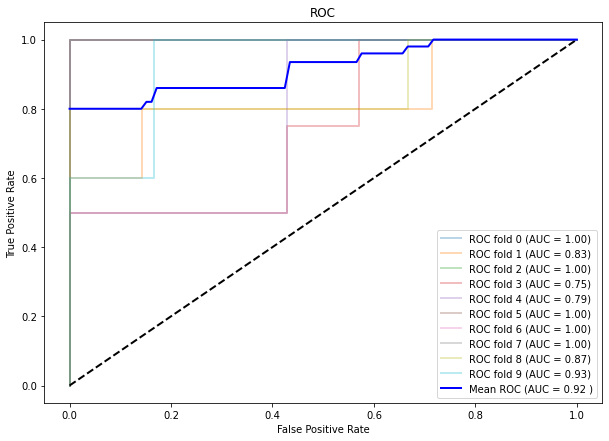

In [269]:
precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []
matthews_score=[]

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93]
random_seed_list = [2,12,22,32,42,52,62,72,82,92]
#outer_random_seed_list = [3,13,23]
#random_seed_list = [2,12,22]
# outer_random_seed_list = [13,23,33,43,53,63,73,83,93]
# random_seed_list = [12,22,32,42,52,62,72,82,92]

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
tprs=[]
 # Use variation of KFold cross validation that returns stratified folds for outer loop in the CV.
    # The folds are made by preserving the percentage of samples for each class.
GNB=GaussianNB()

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)
Gaus_gloves=open("Gauss_Gloves","w")

    # Iterator over the CVs
for index_folder,(train_indexes, test_indexes) in enumerate(skf.split(scaled_data, y_temp_word)):
    X_train,X_test = scaled_data[train_indexes], scaled_data[test_indexes]
    y_train,y_test = y_temp_word[train_indexes], y_temp_word[test_indexes]
    #GNB.probability=True
    GNB.fit(X_train,y_train)
    y_pred = GNB.predict(X_test)
    #y_pred = np.where(y_pred > 0.5, 1, 0)  
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    #print(accuracy_scores)
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    matthews_score.append(matthews_corrcoef(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_temp_word[test], scores))
    
    
    Gaus_gloves.write('Mean_Accuracy: %.3f \n Acc_std: %.3f \n\n Mean_Precision %.2f \n Prec_std: %.3f \n\n Mean_Recall: %.2f \n Recall_std: %.3f \n\n Mean_F1: %.3f \n F1_std: %.3f \n\n Mathew_coeff: %.3f \n Mathew_std: %.3f' \
           %(np.mean(accuracy_scores),np.std(accuracy_scores), np.mean(precision_scores), \
             np.std(precision_scores), np.mean(recall_scores),np.std(recall_scores),\
             np.mean(f1_scores),np.std(f1_scores),np.mean(matthews_score), np.std(matthews_score)))
    

    prediction = GNB.predict_proba(X_test)
    prediction=prediction[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    tprs.append(interp(mean_fpr, fpr, tpr))
    
    #q=roc_auc_score(y_test, prediction)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (index_folder, roc_auc))
print('Mean_Accuracy: %.4f Mean_Precision %.4f Mean_Recall: %.4f' %(np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores)))
print('Mean_F1-measure', np.mean(f1_scores))
print("Mean_mathews Coefficient score",np.mean(matthews_score))

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig("Gauss_Glove")
plt.show()

In [270]:
model=GaussianNB()


model.fit(scaled_data[train], y_temp_word[train])
y_test=model.predict(scaled_data)
precision_s = precision_score(y_test, y_temp_word)
recall_s = recall_score(y_test, y_temp_word)
print(recall_s)
precision_s

0.6935483870967742


0.8958333333333334

In [271]:
y_test=model.predict(X_valid)
precision_s = precision_score(y_test, y_valid)
recall_s = recall_score(y_test,y_valid )
Accuracy_s=accuracy_score(y_test,y_valid)
F_1_s=f1_score(y_test,y_valid)
MCC=matthews_corrcoef(y_test,y_valid)
print("Accuracy :%f recall: %f precision: %f F-score :%f MCC :%f" %(Accuracy_s,recall_s,precision_s, F_1_s,MCC))

Accuracy :0.760331 recall: 0.683168 precision: 0.857143 F-score :0.760331 MCC :0.540311


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 10.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 10.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1.0, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 10.0, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 0.1, 'clf__kernel': 'linear'}
Loop: 9
Accuracy 0.9295454545454545 0.06750930963246728
Precision: 0.9083333333333334 0.12047360245667467
Recall: 0.9350000000000002 0.10012492197250392
F1: 0.9145959595959596 0.08413190980310409
matthew_score: 0.8652255623687145 0.13150889768118332


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 0.1, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1000.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1.0, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 0.01, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1.0, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
Loop: 9
Accuracy 0.9428030303030303 0.058508934826618175
Precision: 0.9633333333333333 0.07371114795831991
Recall: 0.9400000000000001 0.09165151389911678
F1: 0.9464646464646466 0.05383942614640979
matthew_score: 0.8909152959291106 0.11312071438849267


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1.0, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1.0, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 1.0, 'clf__kernel': 'linear'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
Loop: 9
Accuracy 0.9444444444444445 0.053829949876663535
Precision: 0.9466666666666667 0.08192137151629669
Recall: 0.9400000000000001 0.09165151389911678
F1: 0.9373737373737374 0.051663482232502694
matthew_score: 0.8942090300711288 0.10366488592585513
Mean_Accuracy: 0.9444 Mean_Precision 0.9467 Mean_Recall: 0.9400
Mean_F1-measure 0.9373737373737374
Mean_mathews Coefficient score 0.8942090300711288


<ipython-input-272-6663885b7a4b>:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


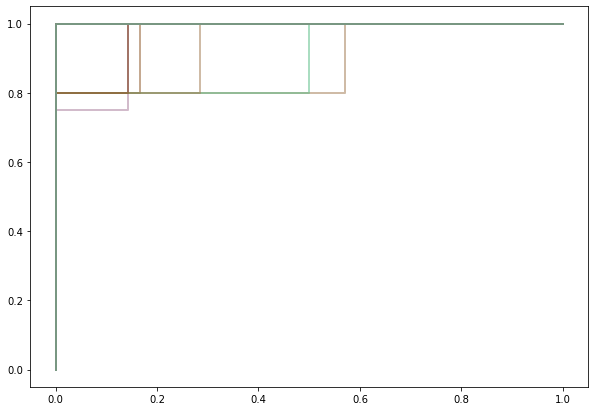

In [272]:
#Support vector machine

precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []
matthews_score=[]
matthews_score_mean=[]
matthews_score_std=[]

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

#outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93]
#random_seed_list = [2,12,22,32,42,52,62,72,82,92]
outer_random_seed_list = [3,13,23]
random_seed_list = [2,12,22]
# outer_random_seed_list = [13,23,33,43,53,63,73,83,93]
# random_seed_list = [12,22,32,42,52,62,72,82,92]
seed=7
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
tprs=[]
precision_scores_std_list=[]
recall_scores_std_list=[]
f1_scores_std_list=[]
matthews_score=[]
accuracy_scores=[]
 # Use variation of KFold cross validation that returns stratified folds for outer loop in the CV.
    # The folds are made by preserving the percentage of samples for each class.

    
    
# Outer cv
for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state =outer_random_seed_list[index] )
    Svm_model_s=open("Support_vect","w")



    for index_folder,(train, test) in enumerate(cv_outer.split(scaled_data, y_temp_word)):
        pipe_svc = Pipeline([('clf', SVC(random_state=1, probability = True))])
        param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
        param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']}, {'clf__C': param_range, 
             'clf__gamma': param_range, 'clf__kernel': ['rbf']}]


        #Inner cv
        cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rand_seed_i)
        gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='f1', cv= cv_inner)

        gs.fit(scaled_data[train], y_temp_word[train])
        print(gs.best_params_)

        scores = gs.best_estimator_.predict(scaled_data[test])
        precision_s = precision_score(y_temp_word[test], scores)
        recall_s = recall_score(y_temp_word[test], scores)
        f1_s = f1_score(y_temp_word[test], scores)
        accuracy_s=accuracy_score(y_temp_word[test], scores)
        #accuracy_scores.append(accuracy_score(y_test, y_pred))

        #print scores

        precision_scores.append(precision_s)
        recall_scores.append(recall_s)
        f1_scores.append(f1_s)
        matthews_score.append(matthews_corrcoef(y_temp_word[test], scores))
        accuracy_scores.append(accuracy_s)

        prediction_ = gs.best_estimator_.predict_proba(scaled_data[test])
        fpr, tpr, thresholds = roc_curve(y_temp_word[test], prediction_[:,1])
        tprs.append(interp(mean_fpr, fpr, tpr))

        #q=roc_auc_score(y_test, prediction)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (index_folder, roc_auc))

        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (index_folder, roc_auc))
        Svm_model_s.write('Mean_Accuracy: %.3f \n Acc_std: %.3f \n\n Mean_Precision %.2f \n Prec_std: %.3f \n\n Mean_Recall: %.2f \n Recall_std: %.3f \n\n Mean_F1: %.3f \n F1_std: %.3f \n\n Mathew_coeff: %.3f \n Mathew_std: %.3f' \
               %(np.mean(accuracy_scores),np.std(accuracy_scores), np.mean(precision_scores), \
                 np.std(precision_scores), np.mean(recall_scores),np.std(recall_scores),\
                 np.mean(f1_scores),np.std(f1_scores),np.mean(matthews_score), np.std(matthews_score)))



    print ('Loop:', index_folder)
    print ("Accuracy", np.mean(accuracy_scores),np.std(accuracy_scores))
    print ('Precision:', np.mean(precision_scores), np.std(precision_scores))
    print ('Recall:', np.mean(recall_scores), np.std(recall_scores))
    print ('F1:', np.mean(f1_scores), np.std(f1_scores))
    print ('matthew_score:', np.mean(matthews_score), np.std(matthews_score))

    precision_scores_mean_list.append(np.mean(precision_scores))
    recall_scores_mean_list.append(np.mean(recall_scores))
    f1_scores_mean_list.append(np.mean(f1_scores))
    matthews_score_mean.append(matthews_score)



    precision_scores_std_list.append(np.std(precision_scores))
    recall_scores_std_list.append(np.std(recall_scores))
    f1_scores_std_list.append(np.std(f1_scores))
    matthews_score_std.append(np.std(matthews_score))

print('Mean_Accuracy: %.4f Mean_Precision %.4f Mean_Recall: %.4f' %(np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores)))
print('Mean_F1-measure', np.mean(f1_scores))
print("Mean_mathews Coefficient score",np.mean(matthews_score))

In [273]:
model=Pipeline([('clf', SVC(random_state=1, probability = True))])


model.fit(scaled_data[train], y_temp_word[train])
y_test=model.predict(scaled_data)
precision_s = precision_score(y_test, y_temp_word)
recall_s = recall_score(y_test, y_temp_word)
print(recall_s)
precision_s

0.9375


0.9375

In [274]:
y_test=model.predict(X_valid)
precision_s = precision_score(y_test, y_valid)
recall_s = recall_score(y_test,y_valid )
Accuracy_s=accuracy_score(y_test,y_valid)
F_1_s=f1_score(y_test,y_valid)
MCC=matthews_corrcoef(y_test,y_valid)
print("Accuracy :%f recall: %f precision: %f F-score :%f MCC :%f" %(Accuracy_s,recall_s,precision_s, F_1_s,MCC))

Accuracy :0.922865 recall: 0.946309 precision: 0.875776 F-score :0.909677 MCC :0.844470


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


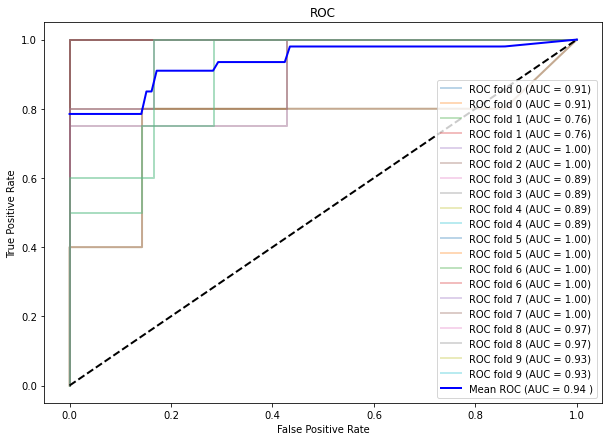

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


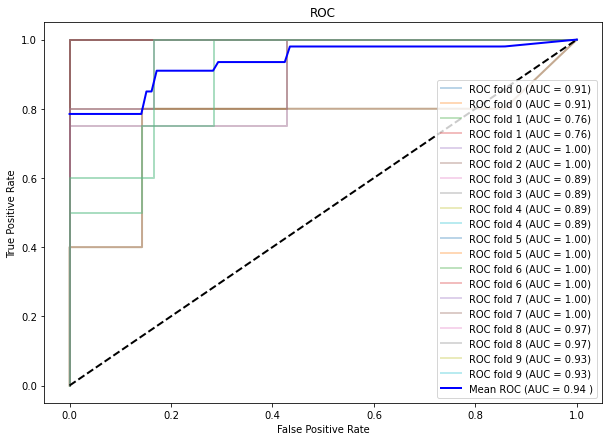

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


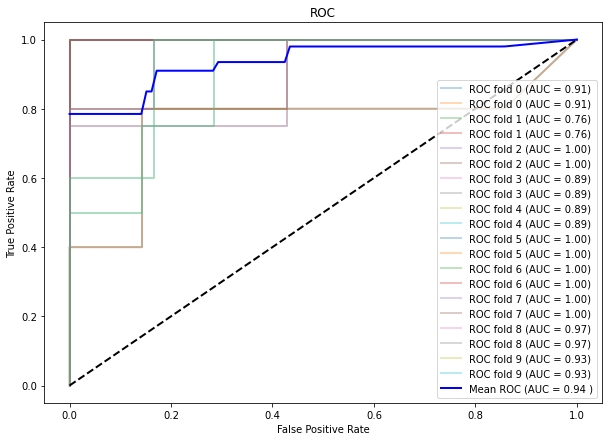

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


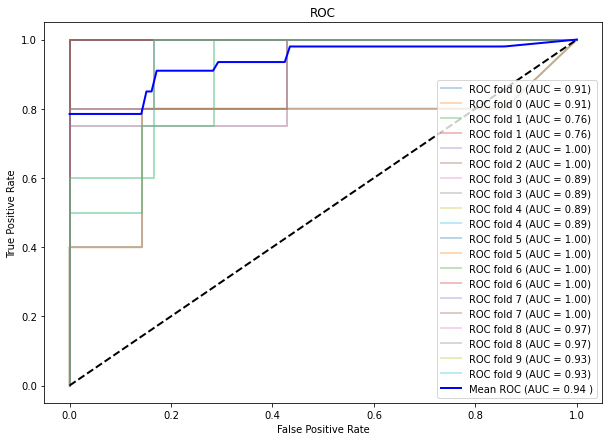

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


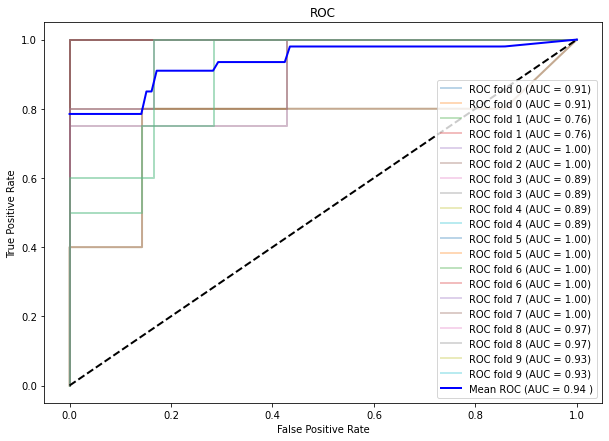

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


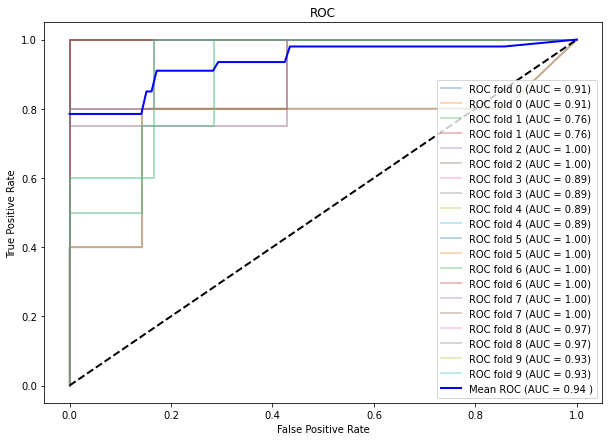

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


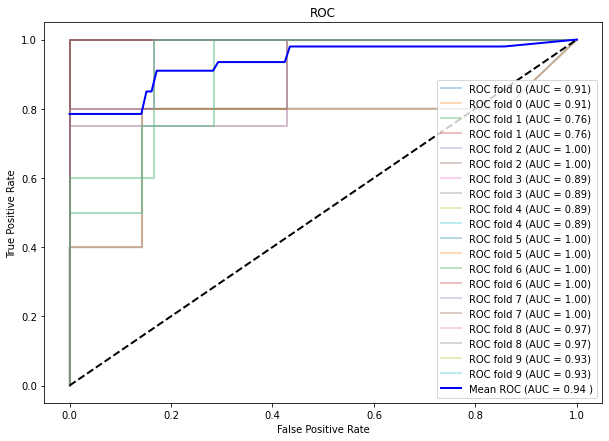

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


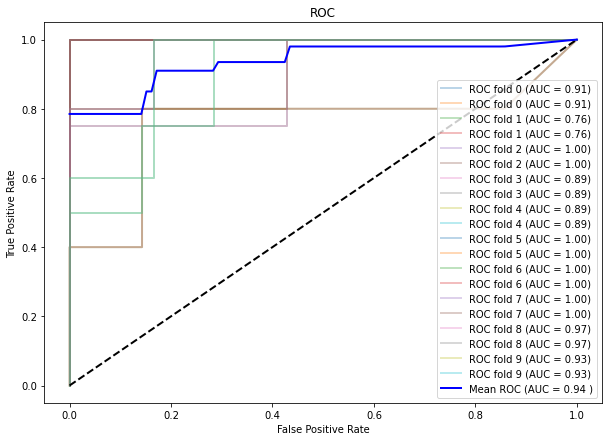

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


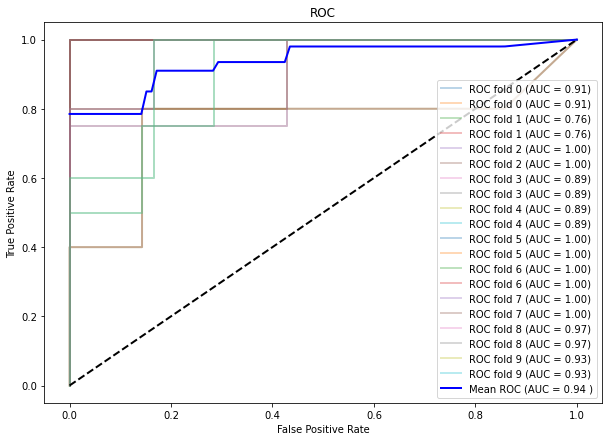

{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 5, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__class_weight': 'balanced', 'randf__criterion': 'entropy', 'randf__max_depth': 5, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 10}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 17}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 3, 'randf__n_estimators': 20}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'gini', 'randf__max_depth': 4, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


{'randf__criterion': 'entropy', 'randf__max_depth': 3, 'randf__n_estimators': 15}


<ipython-input-275-1eb6a36b9b34>:91: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


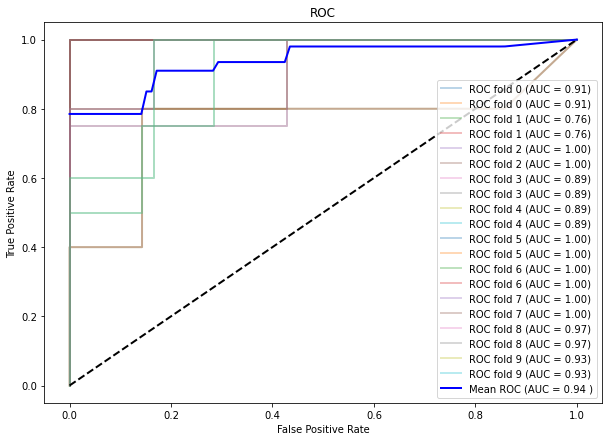

Mean_Accuracy: 0.8947 Mean_Precision 0.9100 Mean_Recall: 0.8300
Mean_F1-measure 0.8560317460317461
Mean_mathews Coefficient score 0.7861990838185648


In [275]:
#RAndForest
precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93]
random_seed_list = [2,12,22,32,42,52,62,72,82,92]
#outer_random_seed_list = [3,13,23]
#random_seed_list = [2,12,22]
# outer_random_seed_list = [13,23,33,43,53,63,73,83,93]
# random_seed_list = [12,22,32,42,52,62,72,82,92]

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
matthews_score=[]
tprs=[]
 # Use variation of KFold cross validation that returns stratified folds for outer loop in the CV.
    # The folds are made by preserving the percentage of samples for each class.



    # Iterator over the CVs
#for index, rand_seed_i in enumerate(random_seed_list):
RandF_model=open("Random_Fores","w")
precision_scores = []
recall_scores = []
f1_scores = []


mean_acc=[]
mean_pre=[]
mean_recall=[]
mean_f_1=[]
mean_MCC=[] 

# Outer cv
for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state =outer_random_seed_list[index] )
    
    RandF_model=open("Random_Fores","w")

    for index_folder,(train, test) in enumerate(skf.split(scaled_data, y_temp_word)):
        pipe_randfor = Pipeline([('randf', RandomForestClassifier(random_state=1))])
            #param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
        param_grid = [{'randf__n_estimators': [10, 13, 15, 17, 20], 'randf__criterion': ['gini', 'entropy'], 
                   'randf__max_depth': [3,4,5,6,7,8,9,10,None]},
                 {'randf__n_estimators': [10, 13, 15, 17, 20], 'randf__criterion': ['gini', 'entropy'], 
                  'randf__max_depth': [3,4,5,6,7,8,9,10,None], 'randf__class_weight': ['balanced']}]


        #Inner cv
        cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 45)
        gs = GridSearchCV(estimator=pipe_randfor, param_grid=param_grid, cv= cv_inner)
        
        

        gs.fit(scaled_data[train], y_temp_word[train])
        
        print(gs.best_params_)

        scores = gs.best_estimator_.predict(scaled_data[test])
        precision_s = precision_score(y_temp_word[test], scores)
        recall_s = recall_score(y_temp_word[test], scores)
        f1_s = f1_score(y_temp_word[test], scores)
        accuracy_s=accuracy_score(y_temp_word[test], scores)

        #print scores

        precision_scores.append(precision_s)
        recall_scores.append(recall_s)
        f1_scores.append(f1_s)
        matthews_score.append(matthews_corrcoef(y_temp_word[test], scores))
        accuracy_scores.append(accuracy_s)


        prediction_ = gs.best_estimator_.predict_proba(scaled_data[test])
        fpr, tpr, thresholds = roc_curve(y_temp_word[test], prediction_[:,1])
        tprs.append(interp(mean_fpr, fpr, tpr))

        #q=roc_auc_score(y_test, prediction)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (index_folder, roc_auc))

        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (index_folder, roc_auc))
        RandF_model.write('Mean_Accuracy: %.3f \n Acc_std: %.3f \n\n Mean_Precision %.2f \n Prec_std: %.3f \n\n Mean_Recall: %.2f \n Recall_std: %.3f \n\n Mean_F1: %.3f \n F1_std: %.3f \n\n Mathew_coeff: %.3f \n Mathew_std: %.3f' \
               %(np.mean(accuracy_scores),np.std(accuracy_scores), np.mean(precision_scores), \
                 np.std(precision_scores), np.mean(recall_scores),np.std(recall_scores),\
                 np.mean(f1_scores),np.std(f1_scores),np.mean(matthews_score), np.std(matthews_score)))


    mean_acc.append(np.mean(accuracy_scores))
    mean_pre.append(np.mean(precision_scores))
    mean_recall.append(np.mean(recall_scores))
    mean_f_1.append(np.mean(f1_scores))
    mean_MCC.append(np.mean(matthews_score))
    


    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
             label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.savefig('RandomF_Plot')
    plt.show()
#print(accuracy_score(y_test, y_pred))
#print('Mean_Accuracy: %.4f' %(np.mean(scores)))      
print('Mean_Accuracy: %.4f Mean_Precision %.4f Mean_Recall: %.4f' %(np.mean(mean_acc), np.mean(mean_pre), np.mean(mean_recall)))
print('Mean_F1-measure', np.mean(mean_f_1))
print("Mean_mathews Coefficient score",np.mean(mean_MCC))
#results.write(np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores))


In [276]:
model=Pipeline([('randf', RandomForestClassifier(random_state=1))])


model.fit(scaled_data[train], y_temp_word[train])
y_test=model.predict(scaled_data)
precision_s = precision_score(y_test, y_temp_word)
recall_s = recall_score(y_test, y_temp_word)
print(recall_s)
precision_s

0.9791666666666666


0.9791666666666666

In [277]:
y_test=model.predict(X_valid)
precision_s = precision_score(y_test, y_valid)
recall_s = recall_score(y_test,y_valid )
Accuracy_s=accuracy_score(y_test,y_valid)
F_1_s=f1_score(y_test,y_valid)
MCC=matthews_corrcoef(y_test,y_valid)
print("Accuracy :%f recall: %f precision: %f F-score :%f MCC :%f" %(Accuracy_s,recall_s,precision_s, F_1_s,MCC))

Accuracy :0.903581 recall: 0.984615 precision: 0.795031 F-score :0.879725 MCC :0.813543
